<h2>Q1</h2>

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

data = pd.read_csv("./marketing_campaign.csv", sep="\t")
warnings.filterwarnings("ignore")
data

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0


In [13]:
data["Income"].fillna(data["Income"].mean(), inplace=True)
data.set_index("ID", inplace=True)
education_mapping = {"PhD" : 0, "Master" : 1, "2n Cycle" : 1, "Graduation" : 2, "Basic"  : 3}
data["Education"].replace(education_mapping, inplace=True)
marital_mapping = {"Married" : 1, "Together" : 1, "Single" : 0, "Divorced" : 0, "Widow" : 0, "Alone" : 0, "YOLO" : 0, "Absurd" : 0}
data["Marital_Status"].replace(marital_mapping, inplace=True)
data["Engagement_Days"] = pd.Series(pd.to_datetime("20-09-2021") - pd.to_datetime(data["Dt_Customer"]), dtype="str").str.split(" ", expand=True).loc[:,0].astype(int)
data.drop("Dt_Customer", axis=1, inplace=True)
data["Amounts_Total"] = data["MntWines"] + data["MntFruits"] + data["MntMeatProducts"] + data["MntFishProducts"] + data["MntSweetProducts"] + data["MntGoldProds"]
data.drop(["MntWines", "MntFruits", "MntMeatProducts", "MntFishProducts", "MntSweetProducts", "MntGoldProds"], axis=1, inplace=True)
data["Purchases_Total"] = data["NumDealsPurchases"] + data["NumWebPurchases"] + data["NumCatalogPurchases"] + data["NumStorePurchases"] + data["NumWebVisitsMonth"]
data.drop(["NumDealsPurchases", "NumWebPurchases", "NumCatalogPurchases", "NumStorePurchases", "NumWebVisitsMonth"], axis=1, inplace=True)
data.drop(["AcceptedCmp3", "AcceptedCmp4", "AcceptedCmp5", "AcceptedCmp1", "AcceptedCmp2", "Z_CostContact", "Z_Revenue"], axis=1, inplace=True)
data

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,Complain,Response,Engagement_Days,Amounts_Total,Purchases_Total
ID,,,,,,,,,,,,
5524,1957,2,0,58138.0,0,0,58,0,1,3451,1617,32
2174,1954,2,0,46344.0,1,1,38,0,0,2605,27,11
4141,1965,2,1,71613.0,0,0,26,0,0,2952,776,25
6182,1984,2,1,26646.0,1,0,26,0,0,2545,53,14
5324,1981,0,1,58293.0,1,0,94,0,0,2801,422,24
...,...,...,...,...,...,...,...,...,...,...,...,...
10870,1967,2,1,61223.0,0,1,46,0,0,3021,1341,23
4001,1946,0,1,64014.0,2,1,56,0,0,2541,444,29
7270,1981,2,0,56981.0,0,0,91,0,0,2795,1241,25


Text(0.5, 1.0, 'Correlation Between Features')

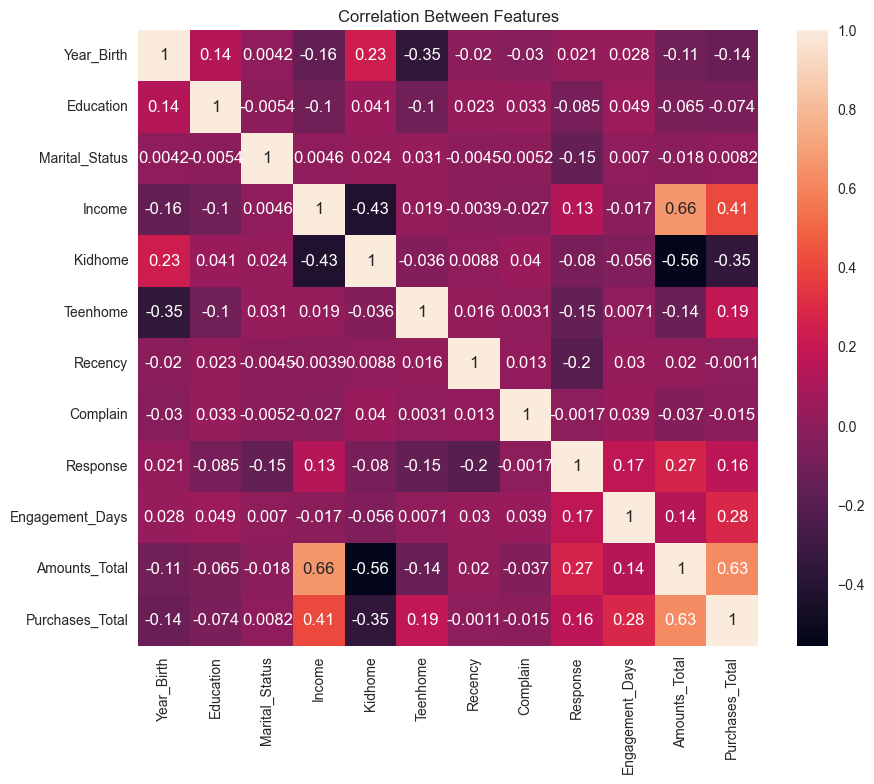

In [14]:
plt.figure(figsize=(10,8))
sns.heatmap(data.corr(), annot=True)
plt.title("Correlation Between Features")

In [15]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

scaler = MinMaxScaler()
data_sc = scaler.fit_transform(data)
model = KMeans()
k = 5
kmeans = KMeans(n_clusters=k, random_state=0)
kmeans.fit(data_sc)
clusters = kmeans.predict(data_sc)

data["Clusters"] = clusters + 1
data["Clusters"] = data["Clusters"].astype(str)
data["Clusters"] = "Cluster_" + data["Clusters"]
data


,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,Complain,Response,Engagement_Days,Amounts_Total,Purchases_Total,Clusters
ID,,,,,,,,,,,,,
5524,1957,2,0,58138.0,0,0,58,0,1,3451,1617,32,Cluster_4
2174,1954,2,0,46344.0,1,1,38,0,0,2605,27,11,Cluster_1
4141,1965,2,1,71613.0,0,0,26,0,0,2952,776,25,Cluster_3
6182,1984,2,1,26646.0,1,0,26,0,0,2545,53,14,Cluster_2
5324,1981,0,1,58293.0,1,0,94,0,0,2801,422,24,Cluster_2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10870,1967,2,1,61223.0,0,1,46,0,0,3021,1341,23,Cluster_3
4001,1946,0,1,64014.0,2,1,56,0,0,2541,444,29,Cluster_2
7270,1981,2,0,56981.0,0,0,91,0,0,2795,1241,25,Cluster_1


In [16]:
desc = data.groupby("Clusters").mean()
desc


,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,Complain,Response,Engagement_Days,Amounts_Total,Purchases_Total
Clusters,,,,,,,,,,,,
Cluster_1,1968.596774,1.403226,0.0,49606.534294,0.467742,0.540323,52.785484,0.008065,0.0,2965.782258,515.109677,19.364516
Cluster_2,1972.791971,1.379562,1.0,39591.663795,1.058394,0.463504,51.565693,0.010949,0.0,2965.972628,177.361314,16.708029
Cluster_3,1965.745257,1.319783,1.0,60270.312682,0.014905,0.600271,50.409214,0.009485,0.0,2989.772358,827.421409,22.162602
Cluster_4,1969.232955,1.119318,0.0,60842.796883,0.284091,0.284091,36.954545,0.017045,1.0,3074.590909,990.352273,22.681818
Cluster_5,1969.620253,1.215190,1.0,59454.031646,0.405063,0.329114,33.632911,0.000000,1.0,3104.170886,984.094937,23.354430


In [17]:
summary = pd.DataFrame(index=desc.columns, columns=["Max_Valued_Cluster", "Min_Valued_Cluster"])
for col in desc.columns:
    summary.loc[col, "Max_Valued_Cluster"] = desc[col].idxmax()
    summary.loc[col, "Min_Valued_Cluster"] = desc[col].idxmin()

summary

,Max_Valued_Cluster,Min_Valued_Cluster
Year_Birth,Cluster_2,Cluster_3
Education,Cluster_1,Cluster_4
Marital_Status,Cluster_2,Cluster_1
Income,Cluster_4,Cluster_2
Kidhome,Cluster_2,Cluster_3
Teenhome,Cluster_3,Cluster_4
Recency,Cluster_1,Cluster_5
Complain,Cluster_4,Cluster_5
Response,Cluster_4,Cluster_1
Engagement_Days,Cluster_5,Cluster_1


In [18]:
def cluster_dist(feature):
    colors = ["tomato", "darkgreen", "cyan", "gold", "violet"]
    all_clusters = list(desc.index)
    col_name = feature
    plt.figure(figsize = (15, 10))
    for i in range(len(colors)):
        plt.subplot(2, 3, i+1)
        sns.histplot(data.loc[data["Clusters"] == all_clusters[i], col_name], color=colors[i], bins=15)
        plt.title(f"Distribution of {col_name} for {all_clusters[i]}")

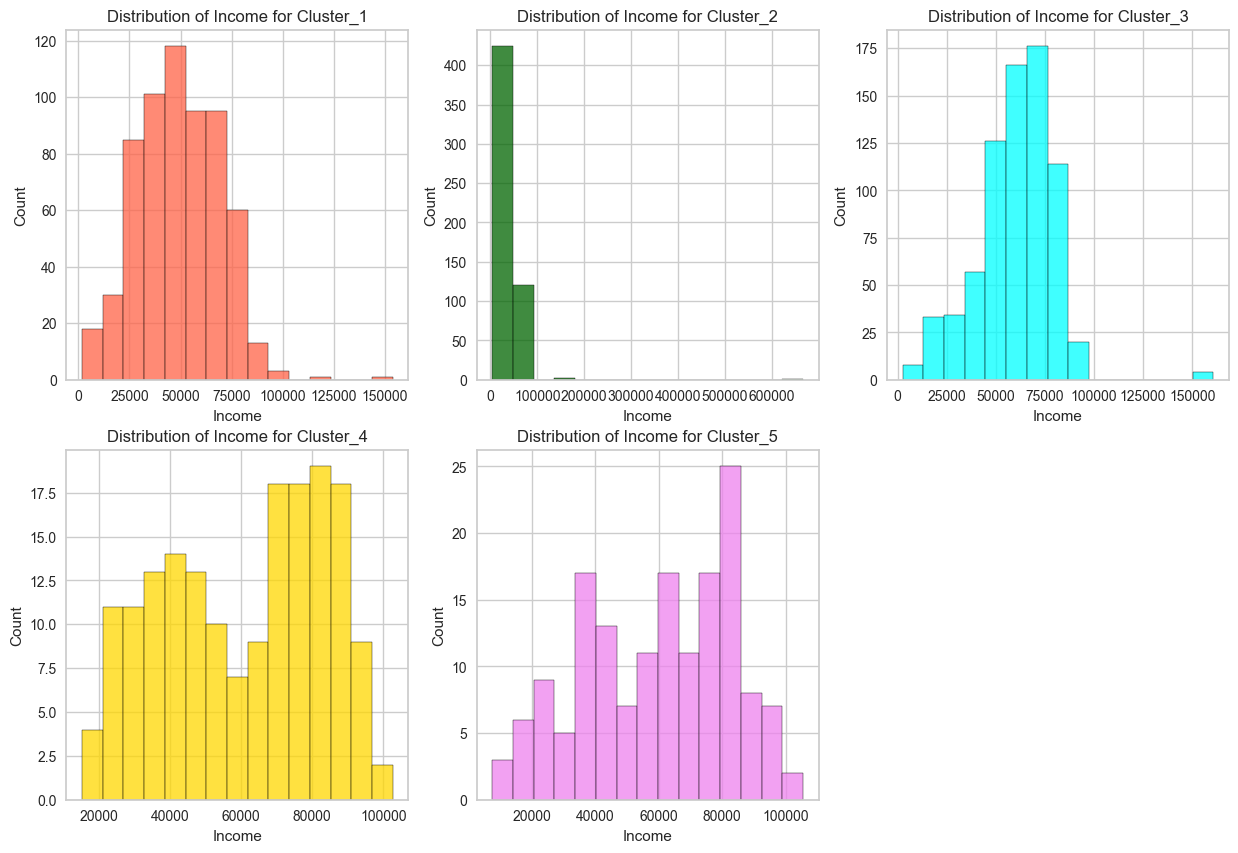

In [19]:
cluster_dist('Income')

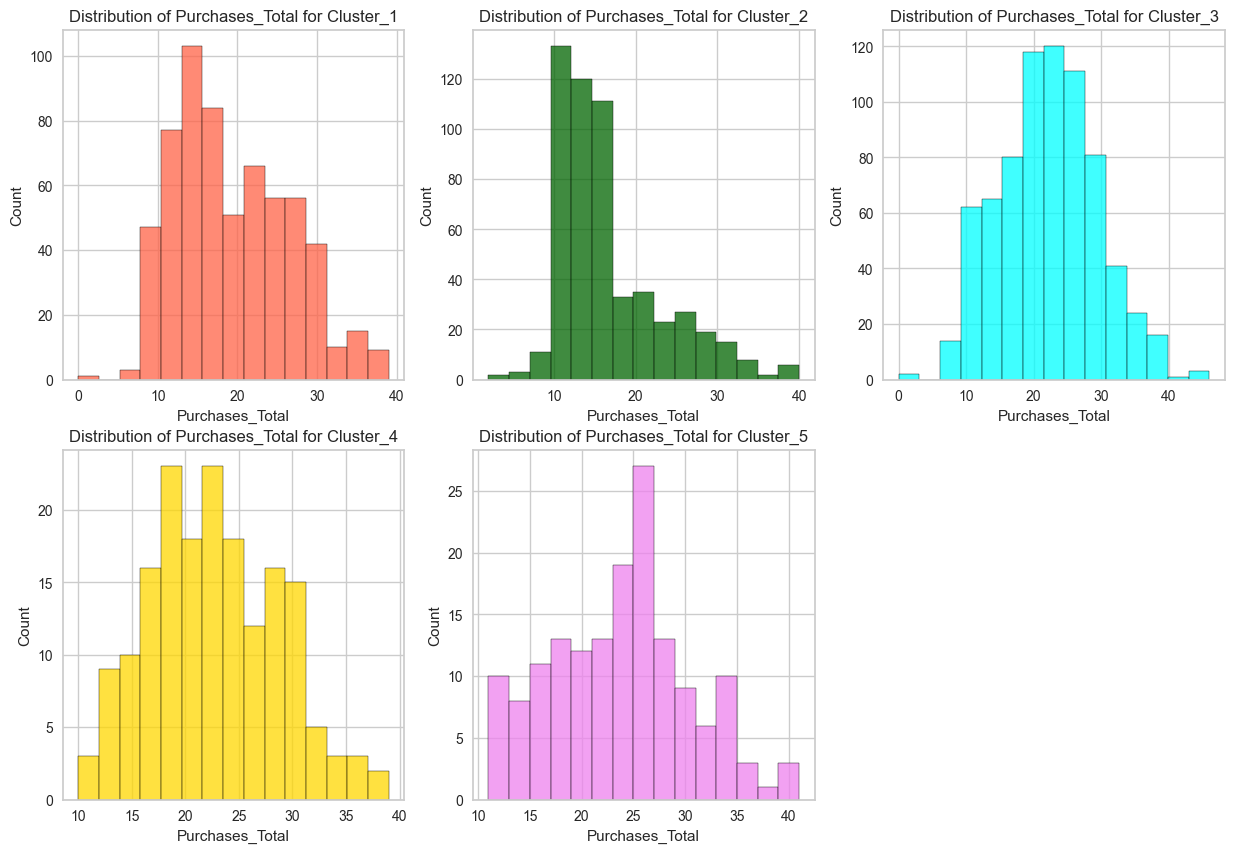

In [20]:
cluster_dist("Purchases_Total")